<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Retrieve-Movie-Frames" data-toc-modified-id="Retrieve-Movie-Frames-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Retrieve Movie Frames</a></span></li><li><span><a href="#Extracting-Faces" data-toc-modified-id="Extracting-Faces-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Extracting Faces</a></span></li><li><span><a href="#Classify-Each-face" data-toc-modified-id="Classify-Each-face-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Classify Each face</a></span></li><li><span><a href="#Generate-Overview-for-one-Movie" data-toc-modified-id="Generate-Overview-for-one-Movie-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Generate Overview for one Movie</a></span></li></ul></div>

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0,'..')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

from PIL import Image, ImageDraw
from facenet_pytorch import MTCNN, extract_face

from cv2 import imread
from cv2 import CascadeClassifier

In [4]:
from diversity_in_cinema.cnn_model import predict_face
from diversity_in_cinema.scraper import get_movies, download_all_frames, frame_urls

# Retrieve Movie Frames

In [5]:
# choose movie name
movie_list = list(get_movies().keys())
# choose movie number
i = 65
movie_list[i]/Users/Moe/code/moe221/final_project/diversity_in_cinema/diversity_in_cinema/face_extractor.py

'Baraka (1992)'

In [8]:
df_movie_2 = download_all_frames(movie_list[i], frame_interval=500)

1001
2001
5501
1
10501
7501
3001
3501
9001
4001
1501
6001
9501
2501
501
6501
5001
4501
8001
10001
7001
8501
Exporting to pandas DataFrame...


In [9]:
df_movie_2

,Frame_Id,Image,Title
0,1,"[[[133, 170, 194], [133, 170, 194], [133, 170,...",Baraka (1992)
1,501,"[[[166, 162, 154], [166, 162, 154], [166, 162,...",Baraka (1992)
2,1001,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",Baraka (1992)
3,1501,"[[[39, 23, 23], [39, 23, 23], [39, 23, 23], [3...",Baraka (1992)
4,2001,"[[[22, 33, 58], [22, 33, 58], [22, 33, 58], [2...",Baraka (1992)
5,2501,"[[[20, 25, 9], [20, 25, 9], [20, 25, 9], [20, ...",Baraka (1992)
6,3001,"[[[101, 90, 87], [86, 84, 88], [86, 84, 88], [...",Baraka (1992)
7,3501,"[[[23, 9, 10], [23, 9, 10], [38, 24, 22], [38,...",Baraka (1992)
8,4001,"[[[119, 102, 104], [114, 93, 101], [106, 89, 1...",Baraka (1992)
9,4501,"[[[138, 136, 149], [138, 130, 134], [138, 130,...",Baraka (1992)


In [15]:
>>> import sys
>>> x = 2
>>> sys.getsizeof(df_movie_2["Image"][5]) # 250

5022848

In [9]:
>>> import sys
>>> x = 2
>>> sys.getsizeof(df_movie_2["Image"][5]) # 256

5022848

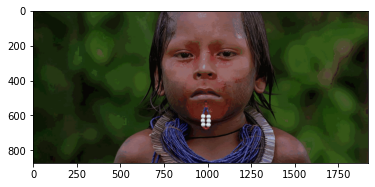

In [10]:
plt.imshow(df_movie_2["Image"][5])

In [28]:
from facenet_pytorch import MTCNN, extract_face
from PIL import Image


def extract_face_mtcnn(image):

    """
    Function which given an image resturns a list of faces all detected
    faces
    """

    mtcnn = MTCNN(keep_all=True,
                      min_face_size=35,
                      post_process=False)
    face_list = []

    print("Extracting faces...")

    img = Image.fromarray(image)

    boxes, probs = mtcnn.detect(img)

    if boxes is not None:
        for box, prob in zip(boxes, probs):

            # return only faces detcted with 99% or higher
            # certanty
            if prob >= 0.99:

                face = extract_face(img, box)
                face_list.append(face)

    print(f"{len(face_list)} faces detected.")

    return face_list


In [54]:
arr.shape

torch.Size([3, 160, 160])

Extracting faces...
1 faces detected.


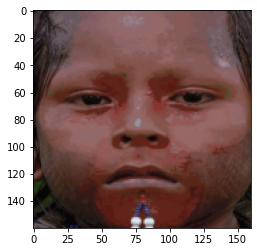

In [61]:
arr = extract_face_mtcnn(df_movie_2["Image"][5])[0]
out = np.array(arr.permute(1, 2, 0))

plt.imshow(out.astype('uint8'))

In [80]:
# project id - replace with your GCP project id
PROJECT_ID="le-wagon-bootcamp-328018"

# bucket name - replace with your GCP bucket name
BUCKET_NAME="diversity-in-cinema-735"


from google.cloud import storage
import os
import pandas as pd
import io
from tempfile import TemporaryFile


# Only need this if you're running this code locally.


arr = extract_face_mtcnn(df_movie_2["Image"][5])[0]
out = np.array(arr.permute(1, 2, 0))
out = out.astype('uint8')

image = Image.fromarray(out)
client = storage.Client()
bucket = client.get_bucket(BUCKET_NAME)
blob = bucket.blob("test_images/test.jpg")

b = io.BytesIO() 
image.save(b, "jpeg") 
image.close() 
blob.upload_from_string(b.getvalue(), content_type="image/jpeg")

print("Image Uploaded")

Extracting faces...
1 faces detected.
Image Uploaded


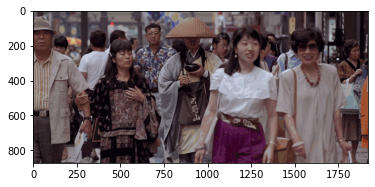

In [24]:
plt.imshow(df_movie_2["Image"][9])

In [47]:
# export movie frame csv without image arrays
df_movie[["title", "frame_no"]].to_csv(f"{movie_list[i]}.csv", index=False)

KeyboardInterrupt: 

# Extracting Faces

In [253]:
def extract_face_mtcnn(dataframe):
    
    """
    Function which given a dataset of frame numbers and frame arrays
    returns a dataframe of faces detected in each frame
    """

    mtcnn = MTCNN(keep_all=True,
                      min_face_size=35,
                      post_process=False)    
    face_dict = {}
    
    print("Extracting faces...")
    
    for frame, frame_id in zip(dataframe["img_array"], tqdm(dataframe["frame_no"])):
        # print bounding box for each detected face
        
        faces_list = []
        
        img = Image.fromarray(frame)
        
        boxes, probs, points = mtcnn.detect(img, landmarks=True)

        if boxes is not None:
            for box, prob in zip(boxes, probs):
                
                if prob >= 0.99:
                    
                    face = extract_face(img, box)
                    faces_list.append(face)
                    
        
        face_dict[frame_id] = faces_list
        
        if frame_id >=300:
            break
    
    
        
    faces_df = pd.DataFrame(data={"frame": list(face_dict.keys()),
                                  "faces": list(face_dict.values())})
        
    return faces_df

In [254]:
faces_df = extract_face_mtcnn(df_movie)

Extracting faces...


  4%|█▍                                       | 75/2129 [00:22<10:12,  3.35it/s]


In [255]:
faces_df

,frame,faces
0,1,[]
1,5,[]
2,9,[]
3,13,[]
4,17,[]
...,...,...
71,285,"[[[tensor([30., 29., 27., 24., 20., 17., 17., ..."
72,289,"[[[tensor([20., 20., 19., 19., 19., 17., 16., ..."
73,293,"[[[tensor([23., 15., 12., 12., 12., 11., 10., ..."
74,297,[]


In [66]:
def extract_face_opencv(dataframe):
    
    """
    Function which given a dataset of frame numbers and frame arrays
    returns a dataframe of faces detected in each frame
    """

    classifier = CascadeClassifier('haarcascade_frontalface_default.xml')
        
    face_dict = {}
    
    print("Extracting faces...")
    
    for frames, frame_id in zip(dataframe["img_array"], tqdm(dataframe["frame_no"])):
        
        # perform face detection
        bboxes = classifier.detectMultiScale(np.array(frames, dtype='uint8'))
        
        # print bounding box for each detected face

        faces_list = []
        if len(bboxes) > 0:
            # extract all faces in image
            for box in bboxes:

                x1, y1, width, height = box

                if (width * height) >= 10_000:
                    x2, y2 = x1 + width, y1 + height
                    face = frames[y1:y2, x1:x2]

                    # resize
                    faces_list.append(face)

        face_dict[frame_id] = faces_list
        
        faces_df = pd.DataFrame(data={"frame":list(face_dict.keys()),
                                      "faces": list(face_dict.values())})
        
        return faces_df

# Classify Each face 

In [151]:
# every rwo is a frame and every frame has n faces

def classify_faces(dataframe):
    
    """
    A function which takes in a dataframe of frame number and the
    extracted face images in each frame as an array
    
    """
    
    df_list = []
    i = 0
    for frame, faces in zip(dataframe["frame"], tqdm(dataframe["faces"])):

        frame_list = []
        gender_list = []
        race_list = []
        face_id_list = []

        results = predict_face(faces)

        for faces in results.values():
            gender = faces["gender"]
            race = faces["dominant_race"]

            frame_list.append(frame)
            gender_list.append(gender)
            race_list.append(race)

            face_id_list.append(i)

            i += 1

        df = pd.DataFrame(data={"frame_number":frame_list,
                                "face_id":face_id_list,
                                "gender":gender_list,
                                "race":race_list})
        df_list.append(df) 
        
    return pd.concat(df_list)

# Generate Overview for one Movie

In [64]:
faces_df = extract_face_mtcnn(df_movie)
faces_df

TypeError: __init__() got an unexpected keyword argument 'margin'

In [152]:
df_classified = classify_faces(faces_df)

Analyzing:   0%|                                          | 0/2 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  4.35it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  4.35it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.53it/s]

Analyzing:  50%|█████████████████                 | 1/2 [00:00<00:00,  2.25it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  4.22it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  4.22it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.49it/s]

Analyzing:   0%|

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.28it/s]

Analyzing:  67%|██████████████████████▋           | 2/3 [00:00<00:00,  2.03it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  4.44it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  4.44it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.25it/s]

Analyzing:   0%|                                          | 0/3 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.97it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.97it/s]

Action: race: 10

Analyzing:   0%|                                          | 0/2 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  2.71it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  2.71it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.28it/s]

Analyzing:  50%|█████████████████                 | 1/2 [00:00<00:00,  1.63it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.04it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.04it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.40it/s]

Analyzing:   0%|

Analyzing:   0%|                                          | 0/2 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.33it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.33it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.63it/s]

Analyzing:  50%|█████████████████                 | 1/2 [00:00<00:00,  1.81it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.73it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.73it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.70it/s]

Action: race: 10

Analyzing:   0%|                                          | 0/2 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.26it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.26it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.62it/s]

Analyzing:  50%|█████████████████                 | 1/2 [00:00<00:00,  1.80it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  4.09it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  4.09it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.10it/s]

Analyzing:   0%|

Analyzing:   0%|                                          | 0/2 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.29it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.29it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.60it/s]

Analyzing:  50%|█████████████████                 | 1/2 [00:00<00:00,  1.79it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.30it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.30it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.65it/s]

Analyzing:   0%|

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  2.82it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  2.82it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.20it/s]

Analyzing:   0%|                                          | 0/2 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.41it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.41it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.65it/s]

Analyzing:  50%|█████████████████                 | 1/2 [00:00<00:00,  1.81it/s]

Finding actions:

Analyzing:   0%|                                          | 0/2 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.36it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.36it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.74it/s]

Analyzing:  50%|█████████████████                 | 1/2 [00:00<00:00,  1.86it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.96it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.96it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.15it/s]

Finding actions:

Analyzing:   0%|                                          | 0/2 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  4.16it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  4.16it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.27it/s]

Analyzing:  50%|█████████████████                 | 1/2 [00:00<00:00,  2.12it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.95it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.95it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.16it/s]

Analyzing:   0%|

Analyzing:   0%|                                          | 0/2 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.91it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.91it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.13it/s]

Analyzing:  50%|█████████████████                 | 1/2 [00:00<00:00,  2.05it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  4.30it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  4.30it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.34it/s]

Analyzing:   0%|

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  4.54it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.55it/s]

Analyzing:   0%|                                          | 0/2 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.31it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.31it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.83it/s]

Analyzing:  50%|█████████████████                 | 1/2 [00:00<00:00,  1.90it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.76it/s]

Action: race:  5

Analyzing:   0%|                                          | 0/2 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.87it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.87it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.53it/s]

Analyzing:  50%|█████████████████                 | 1/2 [00:00<00:00,  1.75it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  4.49it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  4.49it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.49it/s]

Analyzing:   0%|

Analyzing:  67%|██████████████████████▋           | 4/6 [00:02<00:01,  1.87it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  4.46it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  4.46it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.16it/s]

Analyzing:  83%|████████████████████████████▎     | 5/6 [00:02<00:00,  1.93it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.75it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.75it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.75it/s]

Analyzing:   0%|

Analyzing:   0%|                                          | 0/2 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.90it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.90it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.11it/s]

Analyzing:  50%|█████████████████                 | 1/2 [00:00<00:00,  2.04it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  4.57it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  4.57it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.60it/s]

Action: race: 10

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.12it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.16it/s]

Analyzing:  50%|█████████████████                 | 1/2 [00:00<00:00,  1.57it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.23it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.23it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.58it/s]

Analyzing:   0%|                                          | 0/2 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.63it/s]

Action: race:  5

Analyzing:   0%|                                          | 0/2 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  4.36it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  4.36it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.36it/s]

Analyzing:  50%|█████████████████                 | 1/2 [00:00<00:00,  2.16it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.88it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.88it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.08it/s]

Analyzing:   0%|

Analyzing:   0%|                                          | 0/2 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.98it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.98it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.07it/s]

Analyzing:  50%|█████████████████                 | 1/2 [00:00<00:00,  2.02it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  4.57it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  4.57it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.55it/s]

Analyzing:   0%|

Analyzing:   0%|                                          | 0/3 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  4.14it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  4.14it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.35it/s]

Analyzing:  33%|███████████▎                      | 1/3 [00:00<00:00,  2.16it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  4.24it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  4.24it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.06it/s]

Analyzing:  67%|

Analyzing:   0%|                                          | 0/2 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.83it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.83it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.17it/s]

Analyzing:  50%|█████████████████                 | 1/2 [00:00<00:00,  2.07it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  2.73it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  2.73it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.40it/s]

Analyzing:   0%|

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  4.59it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  4.59it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.34it/s]

Analyzing:   0%|                                          | 0/2 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.71it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.71it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.02it/s]

Analyzing:  50%|█████████████████                 | 1/2 [00:00<00:00,  2.00it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender: 

Analyzing:   0%|                                          | 0/2 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.73it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.73it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.13it/s]

Analyzing:  50%|█████████████████                 | 1/2 [00:00<00:00,  2.05it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  4.41it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  4.41it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.42it/s]

Analyzing:   0%|

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.86it/s]


Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.52it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]


Analyzing:   0%|                                          | 0/2 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.36it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.36it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.82it/s]

Analyzing:  50%|█████████████████                 | 1/2 [00:00<00:00,  1.90it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.77it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.77it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.09it/s]

Analyzing:   0%|

Analyzing:   0%|                                          | 0/2 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  2.97it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  2.97it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.40it/s]

Analyzing:  50%|█████████████████                 | 1/2 [00:00<00:00,  1.69it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.81it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.81it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.08it/s]

Analyzing:   0%|

Analyzing:   0%|                                          | 0/3 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  4.03it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  4.03it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.20it/s]

Analyzing:  33%|███████████▎                      | 1/3 [00:00<00:00,  2.08it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  4.44it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  4.44it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.46it/s]

Analyzing:  67%|

Analyzing:   0%|                                          | 0/2 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  4.01it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  4.01it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.07it/s]

Analyzing:  50%|█████████████████                 | 1/2 [00:00<00:00,  2.02it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.03it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.03it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.34it/s]

Analyzing:   0%|

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  2.97it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  2.97it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.12it/s]

Analyzing:   0%|                                          | 0/2 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  2.71it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  2.71it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.12it/s]

Analyzing:  50%|█████████████████                 | 1/2 [00:00<00:00,  1.55it/s]

Finding actions:

Analyzing:   0%|                                          | 0/2 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.12it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.12it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.59it/s]

Analyzing:  50%|█████████████████                 | 1/2 [00:00<00:00,  1.78it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.83it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.83it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.81it/s]

Analyzing:   0%|

 41%|███████████████▊                       | 1606/3951 [08:18<18:50,  2.07it/s]


Analyzing:   0%|                                          | 0/2 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  4.19it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  4.19it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.16it/s]

Analyzing:  50%|█████████████████                 | 1/2 [00:00<00:00,  2.07it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  4.55it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  4.55it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.33it/s]

Analyzing:   0%|

Analyzing:   0%|                                          | 0/3 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.58it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.58it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.62it/s]

Analyzing:  33%|███████████▎                      | 1/3 [00:00<00:01,  1.80it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.98it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.98it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.08it/s]

Analyzing:  67%|

Analyzing:   0%|                                          | 0/2 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  4.32it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  4.32it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.25it/s]

Analyzing:  50%|█████████████████                 | 1/2 [00:00<00:00,  2.11it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  4.25it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  4.25it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.30it/s]

Analyzing:   0%|

Analyzing:   0%|                                          | 0/2 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  4.07it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  4.07it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.30it/s]

Analyzing:  50%|█████████████████                 | 1/2 [00:00<00:00,  2.13it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  4.41it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  4.41it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.48it/s]

Analyzing:   0%|

Analyzing:   0%|                                          | 0/2 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.87it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.87it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.08it/s]

Analyzing:  50%|█████████████████                 | 1/2 [00:00<00:00,  2.03it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  4.41it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  4.41it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.29it/s]

Analyzing:   0%|

Analyzing:   0%|                                          | 0/2 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.20it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.20it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.57it/s]

Analyzing:  50%|█████████████████                 | 1/2 [00:00<00:00,  1.77it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  4.30it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  4.30it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.27it/s]

Analyzing:   0%|

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.89it/s]

Analyzing:  67%|██████████████████████▋           | 2/3 [00:01<00:00,  1.85it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  4.31it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  4.31it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.87it/s]

Analyzing:   0%|                                          | 0/3 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  2.85it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  2.85it/s]

Action: race: 10

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.28it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.28it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.33it/s]

Analyzing:  43%|██████████████▌                   | 3/7 [00:01<00:02,  1.78it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.53it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.53it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.54it/s]

Analyzing:  57%|███████████████████▍              | 4/7 [00:02<00:01,  1.77it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender: 

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.69it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.69it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.64it/s]

Analyzing:   0%|                                          | 0/2 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.34it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.34it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.87it/s]

Analyzing:  50%|█████████████████                 | 1/2 [00:00<00:00,  1.93it/s]

Finding actions:

Analyzing:  20%|██████▊                           | 1/5 [00:00<00:02,  1.82it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  4.10it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  4.10it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.20it/s]

Analyzing:  40%|█████████████▌                    | 2/5 [00:01<00:01,  1.96it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  4.21it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  4.21it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.23it/s]

Analyzing:  60%|

Analyzing:   0%|                                          | 0/2 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  4.28it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  4.28it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.98it/s]

Analyzing:  50%|█████████████████                 | 1/2 [00:00<00:00,  1.98it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.86it/s]



Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.86it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.00it/s]

Analyzing:   0%|                                          | 0/2 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.34it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.34it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.70it/s]

Analyzing:  50%|█████████████████                 | 1/2 [00:00<00:00,  1.84it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  4.15it/s]

Action: race:  5

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]


Analyzing:   0%|                                          | 0/2 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.02it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.02it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.28it/s]

Analyzing:  50%|█████████████████                 | 1/2 [00:00<00:00,  1.63it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  2.98it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  2.98it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.55it/s]

Action: gender: 

Analyzing:   0%|                                          | 0/2 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  4.24it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  4.24it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.00it/s]

Analyzing:  50%|█████████████████                 | 1/2 [00:00<00:00,  1.99it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.97it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.97it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.10it/s]

Analyzing:   0%|

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.26it/s]

Analyzing:  67%|██████████████████████▋           | 2/3 [00:00<00:00,  2.08it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  2.96it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  2.96it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.25it/s]

Analyzing:   0%|                                          | 0/3 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.22it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.22it/s]

Action: race: 10

Analyzing:   0%|                                          | 0/2 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.58it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.58it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.99it/s]

Analyzing:  50%|█████████████████                 | 1/2 [00:00<00:00,  1.98it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.12it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.12it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.66it/s]

Analyzing:   0%|

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.45it/s]

Analyzing:   0%|                                          | 0/3 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.34it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.34it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.37it/s]

Analyzing:  33%|███████████▎                      | 1/3 [00:00<00:01,  1.67it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.86it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.86it/s]

Action: race: 10

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  4.02it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  4.02it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.57it/s]

Analyzing:  50%|█████████████████                 | 1/2 [00:00<00:00,  1.77it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.69it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.69it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.53it/s]

Analyzing:   0%|                                          | 0/2 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender: 

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  4.14it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.29it/s]

Analyzing:  50%|█████████████████                 | 1/2 [00:00<00:00,  2.13it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  4.05it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  4.05it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.99it/s]

Analyzing:   0%|                                          | 0/3 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  2.22it/s]

Action: race:  5

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]


Analyzing:   0%|                                          | 0/2 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  4.24it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  4.24it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.30it/s]

Analyzing:  50%|█████████████████                 | 1/2 [00:00<00:00,  2.14it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  4.03it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  4.03it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.57it/s]

Action: gender: 

Analyzing:   0%|                                          | 0/2 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  4.31it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  4.31it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.45it/s]

Analyzing:  50%|█████████████████                 | 1/2 [00:00<00:00,  2.21it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  4.52it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  4.52it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.58it/s]

Analyzing:   0%|

Analyzing:   0%|                                          | 0/2 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.87it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.87it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.19it/s]

Analyzing:  50%|█████████████████                 | 1/2 [00:00<00:00,  2.08it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  4.60it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  4.60it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.60it/s]

Analyzing:   0%|

Analyzing:   0%|                                          | 0/3 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  4.44it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  4.44it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.48it/s]

Analyzing:  33%|███████████▎                      | 1/3 [00:00<00:00,  2.22it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  4.59it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  4.59it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.43it/s]

Analyzing:  67%|

Analyzing:   0%|                                          | 0/2 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  4.49it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  4.49it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.43it/s]

Analyzing:  50%|█████████████████                 | 1/2 [00:00<00:00,  2.20it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  4.44it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  4.44it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.51it/s]

Action: race:  5

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.03it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.34it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.12it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.96it/s]


Analyzing:   0%|                                          | 0/2 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.79it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.79it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.04it/s]

Analyzing:  50%|█████████████████                 | 1/2 [00:00<00:00,  2.00it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.97it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.97it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.18it/s]

Analyzing:   0%|

Analyzing:   0%|                                          | 0/2 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  4.22it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  4.22it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.42it/s]

Analyzing:  50%|█████████████████                 | 1/2 [00:00<00:00,  2.19it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  4.63it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  4.63it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.58it/s]

Analyzing:   0%|

Analyzing:   0%|                                          | 0/2 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  2.95it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  2.95it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.37it/s]

Analyzing:  50%|█████████████████                 | 1/2 [00:00<00:00,  1.68it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.92it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.92it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.96it/s]

Analyzing:   0%|

Analyzing:   0%|                                          | 0/2 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.99it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.99it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.10it/s]

Analyzing:  50%|█████████████████                 | 1/2 [00:00<00:00,  2.03it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  4.43it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  4.43it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.13it/s]

Analyzing:   0%|

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.08it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.36it/s]

Analyzing:  50%|█████████████████                 | 1/2 [00:00<00:00,  1.67it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.96it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.96it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.92it/s]

Analyzing:   0%|                                          | 0/2 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.90it/s]

Action: race:  5

Analyzing:   0%|                                          | 0/2 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.74it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.74it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.83it/s]

Analyzing:  50%|█████████████████                 | 1/2 [00:00<00:00,  1.90it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.94it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.94it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.98it/s]

Analyzing:   0%|

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.85it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.85it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.12it/s]

Analyzing:  75%|█████████████████████████▌        | 3/4 [00:01<00:00,  1.99it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  4.14it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  4.14it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.18it/s]

Analyzing:   0%|                                          | 0/3 [00:00<?, ?it/s]

Finding actions:

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.27it/s]

Analyzing:  50%|█████████████████                 | 1/2 [00:00<00:00,  2.12it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  4.25it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  4.25it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.30it/s]

Analyzing:   0%|                                          | 0/2 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  4.19it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  4.19it/s]

Action: race: 10

Analyzing:   0%|                                          | 0/2 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.86it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.86it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.15it/s]

Analyzing:  50%|█████████████████                 | 1/2 [00:00<00:00,  2.06it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  4.00it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  4.00it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.10it/s]

Action: race: 10

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.89it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.89it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.11it/s]

Analyzing:  80%|███████████████████████████▏      | 4/5 [00:02<00:00,  1.91it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.82it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.82it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.85it/s]

Analyzing:   0%|                                          | 0/3 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender: 

Analyzing:   0%|                                          | 0/3 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  4.18it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  4.18it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.17it/s]

Analyzing:  33%|███████████▎                      | 1/3 [00:00<00:00,  2.07it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  4.10it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  4.10it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.28it/s]

Analyzing:  67%|

Analyzing:   0%|                                          | 0/2 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.58it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.58it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.65it/s]

Analyzing:  50%|█████████████████                 | 1/2 [00:00<00:00,  1.81it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.73it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.73it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.99it/s]

Analyzing:   0%|

Analyzing:   0%|                                          | 0/3 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.47it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.47it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.59it/s]

Analyzing:  33%|███████████▎                      | 1/3 [00:00<00:01,  1.78it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.75it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.75it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.80it/s]

Analyzing:  67%|

Analyzing:   0%|                                          | 0/2 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.01it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.01it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.05it/s]

Analyzing:  50%|█████████████████                 | 1/2 [00:00<00:00,  1.52it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  2.69it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  2.69it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.05it/s]

Analyzing:   0%|

Analyzing:   0%|                                          | 0/2 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.23it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.23it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.40it/s]

Analyzing:  50%|█████████████████                 | 1/2 [00:00<00:00,  1.69it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.57it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.57it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.55it/s]

Action: race: 10

Analyzing:   0%|                                          | 0/3 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.47it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.47it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.48it/s]

Analyzing:  33%|███████████▎                      | 1/3 [00:00<00:01,  1.73it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  4.05it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  4.05it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.78it/s]

Analyzing:  67%|

Analyzing:   0%|                                          | 0/4 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  4.02it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  4.02it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.14it/s]

Analyzing:  25%|████████▌                         | 1/4 [00:00<00:01,  2.05it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.95it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.95it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.14it/s]

Analyzing:  50%|

Analyzing:   0%|                                          | 0/2 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.47it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.47it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.50it/s]

Analyzing:  50%|█████████████████                 | 1/2 [00:00<00:00,  1.74it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.64it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.64it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.63it/s]

Analyzing:   0%|

Analyzing:   0%|                                          | 0/2 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  4.14it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  4.14it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.27it/s]

Analyzing:  50%|█████████████████                 | 1/2 [00:00<00:00,  2.12it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.87it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.87it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.06it/s]

Analyzing:   0%|

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  4.34it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  4.34it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.29it/s]

Analyzing:  50%|█████████████████                 | 1/2 [00:00<00:00,  2.13it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  4.34it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  4.34it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.21it/s]

Analyzing:   0%|                                          | 0/2 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender: 

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  4.35it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  4.35it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.43it/s]

Analyzing:   0%|                                          | 0/2 [00:00<?, ?it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender:   0%|                                     | 0/2 [00:00<?, ?it/s]

Action: gender:  50%|██████████████▌              | 1/2 [00:00<00:00,  3.04it/s]

Action: race:  50%|███████████████▌               | 1/2 [00:00<00:00,  3.04it/s]

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  3.61it/s]

Analyzing:  50%|█████████████████                 | 1/2 [00:00<00:00,  1.79it/s]

Finding actions:   0%|                                    | 0/2 [00:00<?, ?it/s]

Action: gender: 